<a href="https://colab.research.google.com/github/hyeonji-cho/2023-OUTTA/blob/main/3_ML(%EC%8A%A4%EC%BC%88%EB%A0%88%ED%86%A4)_%2B_%EC%B6%94%EA%B0%80%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 워닝 지우기
import warnings
warnings.filterwarnings( 'ignore' )

In [ ]:
df = pd.read_csv('esg_after_preprocessing.csv', encoding='utf-8-sig', index_col=0)

In [ ]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
3177,흥국화재,B+,B,A,B,2021,792,3.5,3.0,4.0,3.0
3178,흥국화재,B+,C,B+,B+,2022,792,3.5,2.0,3.5,3.5
3179,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0
3180,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0


In [ ]:
# 총 778개의 회사의 대략 4년치 esg 데이터
len(df['회사명'].unique())

780

### 중복값 지우기

다음과 같이 연도별 중복값이 있는 경우가 있어서 지워주기

In [ ]:
df[df['회사명'] == '미래에셋증권']

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1244,미래에셋증권,A,B+,A+,B+,2020,311,4.0,3.5,4.5,3.5
1245,미래에셋증권,B+,A,A+,B,2021,311,3.5,4.0,4.5,3.0
1246,미래에셋증권,A,A,A+,B+,2022,311,4.0,4.0,4.5,3.5
1247,미래에셋증권,A,A,A+,B+,2023,311,4.0,4.0,4.5,3.5


In [ ]:
df[df['회사명'] == '미원홀딩스']

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1256,미원홀딩스,C,C,C,C,2020,314,2.0,2.0,2.0,2.0
1257,미원홀딩스,C,C,C,B,2021,314,2.0,2.0,2.0,3.0
1258,미원홀딩스,C,C,C,B,2022,314,2.0,2.0,2.0,3.0
1259,미원홀딩스,C,C,C,B,2023,314,2.0,2.0,2.0,3.0


In [ ]:
# 회사명, 종합등급, 연도가 동일한 경우 지워주기
df = df.drop_duplicates(subset=['회사명', 'KCGS_종합등급', '연도'])

In [ ]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
3177,흥국화재,B+,B,A,B,2021,792,3.5,3.0,4.0,3.0
3178,흥국화재,B+,C,B+,B+,2022,792,3.5,2.0,3.5,3.5
3179,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0
3180,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0


In [ ]:
# unique 한 값만 가져오기 - 중복되지 않은 회사명 가져오기
companies = df['회사명'].unique()

In [ ]:
# 각 회사에서 가장 오래된 esg 점수와 가장 최신의 esg 점수를 조회할 수 있다.
for company in companies:
    company_df = df[df['회사명'] == company]
    print(company_df.iloc[0,:])
    print('-'*30)
    print(company_df.iloc[-1,:])
    break

회사명                  AJ네트웍스
KCGS_종합등급                 B
KCGS_환경                   D
KCGS_사회                   B
KCGS_지배구조                 B
연도                     2020
company_id                0
KCGS_종합등급_encoded       3.0
KCGS_환경_encoded         1.0
KCGS_사회_encoded         3.0
KCGS_지배구조_encoded       3.0
Name: 0, dtype: object
------------------------------
회사명                  AJ네트웍스
KCGS_종합등급                B+
KCGS_환경                   C
KCGS_사회                  B+
KCGS_지배구조                B+
연도                     2023
company_id                0
KCGS_종합등급_encoded       3.5
KCGS_환경_encoded         2.0
KCGS_사회_encoded         3.5
KCGS_지배구조_encoded       3.5
Name: 3, dtype: object


In [ ]:
# esg 점수가 좋아졌는지 파악하기
# 최신 종합점수 - 가장 오래된 종합 점숫

result_dict = {}

for company in companies:
    company_df = df[df['회사명'] == company]
    old = company_df.iloc[0,:]['KCGS_종합등급_encoded']
    new = company_df.iloc[-1,:]['KCGS_종합등급_encoded']
    result_dict[company] = new - old

In [ ]:
result_dict

{'AJ네트웍스': 0.5,
 'AK홀딩스': 0.0,
 'BGF': 0.0,
 'BGF리테일': 0.0,
 'BNK금융지주': -0.5,
 'BYC': -2.0,
 'CJ': -0.5,
 'CJ CGV': -0.5,
 'CJ대한통운': -0.5,
 'CJ씨푸드': 0.0,
 'CJ제일제당': 0.0,
 'CS홀딩스': 0.0,
 'DB': 0.0,
 'DB금융투자': 0.0,
 'DB손해보험': 0.0,
 'DB하이텍': -0.5,
 'DGB금융지주': -0.5,
 'DL': 0.5,
 'DL건설': 1.0,
 'DL이앤씨': 0.0,
 'DN오토모티브': -1.0,
 'DRB동일': -1.0,
 'DSR': -1.0,
 'DSR제강': 0.0,
 'E1': 0.5,
 'F&F 홀딩스': 2.0,
 'GKL': 0.5,
 'GS': 0.5,
 'GS건설': 0.0,
 'GS글로벌': 0.5,
 'GS리테일': 1.0,
 'HDC': -1.5,
 'HDC랩스': -1.0,
 'HDC현대EP': -1.0,
 'HDC현대산업개발': 0.0,
 'HD한국조선해양': 0.0,
 'HD현대': 0.0,
 'HD현대건설기계': 0.0,
 'HD현대에너지솔루션': 0.0,
 'HD현대인프라코어': -0.5,
 'HD현대일렉트릭': -0.5,
 'HD현대중공업': 0.0,
 'HJ중공업': 0.0,
 'HL D&I': 0.0,
 'HLB글로벌': -1.0,
 'HL만도': 0.0,
 'HL홀딩스': 0.0,
 'HMM': 0.0,
 'HSD엔진': -0.5,
 'HS애드': 0.0,
 'JB금융지주': -0.5,
 'JW생명과학': -1.5,
 'JW중외제약': -1.0,
 'JW홀딩스': 0.0,
 'KB금융': 0.0,
 'KC그린홀딩스': -2.0,
 'KC코트렐': -2.0,
 'KEC': -1.0,
 'KG모빌리티': 0.0,
 'KG스틸': -1.0,
 'KG케미칼': 0.0,
 'KH 필룩스': -1.0,
 'KIB플러그에너지': -1.0,
 'KISCO홀딩스'

In [ ]:
pd.Series(result_dict.values()).value_counts() # 각각 분포가 어떤지 조회하기 hint: value counts

 0.0    256
-1.0    243
-2.0     86
 0.5     70
-0.5     52
-1.5     29
 1.0     28
 1.5      9
 2.0      3
-2.5      3
 2.5      1
dtype: int64

In [ ]:
# df에 새로운 열 추가하기
df['increase_decrease'] = df['회사명'].map(result_dict)

In [ ]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0,0.5
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0,0.5
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5,0.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5,0.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3177,흥국화재,B+,B,A,B,2021,792,3.5,3.0,4.0,3.0,0.5
3178,흥국화재,B+,C,B+,B+,2022,792,3.5,2.0,3.5,3.5,0.5
3179,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0,1.0
3180,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0,1.0


In [ ]:
# 중간 저장
df.to_csv('esg_after_preprocessing2.csv', encoding='utf-8-sig')

# ML

In [ ]:
# 분석을 위해 2023년 데이터만 갖고 오기
df_2023 = df[df['연도'] == 2023].reset_index(drop=True)
df_2023

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5,0.5
1,AK홀딩스,B+,B,A,B,2023,1,3.5,3.0,4.0,3.0,0.0
2,BGF,B+,A,A+,B,2023,2,3.5,4.0,4.5,3.0,0.0
3,BGF리테일,A,A,A+,A,2023,3,4.0,4.0,4.5,4.0,0.0
4,BNK금융지주,A,A,A,A,2023,4,4.0,4.0,4.0,4.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
741,효성티앤씨,A,A,A+,B+,2023,785,4.0,4.0,4.5,3.5,-0.5
742,효성화학,A,A,A+,B+,2023,786,4.0,4.0,4.5,3.5,-0.5
743,후성,B,B,B+,B,2023,787,3.0,3.0,3.5,3.0,1.0
744,휠라홀딩스,B+,B,A,B+,2023,788,3.5,3.0,4.0,3.5,0.0


In [ ]:
# 이 중 필요한 열만 갖고오기
df_2023 = df_2023[['회사명', 'KCGS_종합등급_encoded', 'KCGS_환경_encoded', 'KCGS_사회_encoded', 'KCGS_지배구조_encoded', 'increase_decrease']]

### Clustering

In [ ]:
df_2023

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,3.5,2.0,3.5,3.5,0.5
1,AK홀딩스,3.5,3.0,4.0,3.0,0.0
2,BGF,3.5,4.0,4.5,3.0,0.0
3,BGF리테일,4.0,4.0,4.5,4.0,0.0
4,BNK금융지주,4.0,4.0,4.0,4.0,-0.5
...,...,...,...,...,...,...
741,효성티앤씨,4.0,4.0,4.5,3.5,-0.5
742,효성화학,4.0,4.0,4.5,3.5,-0.5
743,후성,3.0,3.0,3.5,3.0,1.0
744,휠라홀딩스,3.5,3.0,4.0,3.5,0.0


In [ ]:
data = df_2023.iloc[:,1:]

### 계층적 군집화 실행
총 몇개의 클러스터가 적합한지 파악하기 위해서

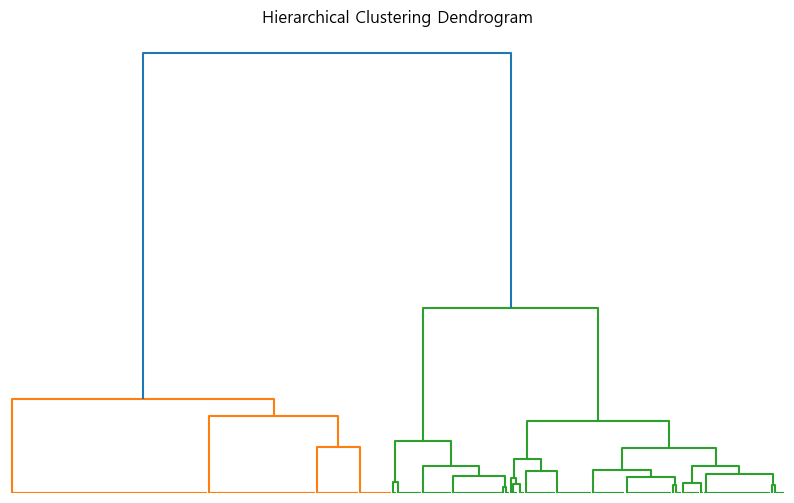

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 군집화 수행
linkage_matrix = linkage(df_2023.iloc[:, 2:-2], method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df_2023['회사명'].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.axis('off')
plt.show()

크게 4개의 클러스터로 나뉘는 걸 알 수 있다

In [ ]:
from sklearn.cluster import KMeans

# 클러스터링 수행
kmeans = KMeans(n_clusters=4)  # 클러스터 개수 설정
clusters = kmeans.fit_predict(data)

In [ ]:
df_2023['클러스터'] = clusters

# 총 4가지의 군집을 볼 수 있다

In [ ]:
df_2023[df_2023['클러스터'] == 0]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
9,CJ씨푸드,3.0,2.0,3.0,3.0,0.0,0
12,DB,3.0,1.0,3.0,3.5,0.0,0
13,DB금융투자,3.0,2.0,3.0,3.0,0.0,0
15,DB하이텍,3.0,3.0,3.5,3.0,-0.5,0
21,DRB동일,2.0,1.0,3.5,3.0,-1.0,0
...,...,...,...,...,...,...,...
718,현대코퍼레이션,3.0,2.0,3.0,3.0,0.0,0
719,현대코퍼레이션홀딩스,3.0,2.0,3.0,3.5,1.0,0
727,화성산업,3.0,2.0,3.5,3.0,0.0,0
731,화신,2.0,2.0,4.0,2.0,0.0,0


In [ ]:
df_2023[df_2023['클러스터'] == 1]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
0,AJ네트웍스,3.5,2.0,3.5,3.5,0.5,1
1,AK홀딩스,3.5,3.0,4.0,3.0,0.0,1
2,BGF,3.5,4.0,4.5,3.0,0.0,1
3,BGF리테일,4.0,4.0,4.5,4.0,0.0,1
4,BNK금융지주,4.0,4.0,4.0,4.0,-0.5,1
...,...,...,...,...,...,...,...
740,효성첨단소재,4.0,3.5,4.5,4.0,-0.5,1
741,효성티앤씨,4.0,4.0,4.5,3.5,-0.5,1
742,효성화학,4.0,4.0,4.5,3.5,-0.5,1
743,후성,3.0,3.0,3.5,3.0,1.0,1


In [ ]:
df_2023[df_2023['클러스터'] == 2]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
11,CS홀딩스,2.0,1.0,1.0,3.0,0.0,2
20,DN오토모티브,2.0,2.0,1.0,3.0,-1.0,2
23,DSR제강,2.0,1.0,2.0,3.0,0.0,2
34,HDC현대산업개발,2.0,1.0,2.0,3.0,0.0,2
57,KEC,2.0,2.0,1.0,2.0,-1.0,2
...,...,...,...,...,...,...,...
697,한진중공업홀딩스,2.0,1.0,1.0,3.5,-1.0,2
700,한창제지,2.0,2.0,2.0,3.0,-1.0,2
729,화승인더스트리,2.0,2.0,2.0,3.5,-1.0,2
730,화승코퍼레이션,2.0,2.0,2.0,3.0,-1.5,2


In [ ]:
df_2023[df_2023['클러스터'] == 3]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
5,BYC,1.0,1.0,1.0,1.0,-2.0,3
22,DSR,1.0,1.0,2.0,1.0,-1.0,3
32,HDC랩스,1.0,1.0,1.0,1.0,-1.0,3
44,HLB글로벌,1.0,1.0,2.0,1.0,-1.0,3
55,KC그린홀딩스,1.0,1.0,1.0,2.0,-2.0,3
...,...,...,...,...,...,...,...
725,호전실업,1.0,1.0,1.0,2.0,-1.0,3
732,화인베스틸,1.0,2.0,1.0,1.0,-2.0,3
733,화천기계,1.0,1.0,1.0,1.0,-1.0,3
734,화천기공,1.0,1.0,1.0,2.0,-1.0,3


In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
cluster_centers

array([[ 2.41732283,  2.03543307,  3.32283465,  2.34645669, -0.53543307],
       [ 3.71713147,  3.49601594,  4.02589641,  3.57171315,  0.22310757],
       [ 1.96062992,  1.31496063,  1.52755906,  2.77952756, -0.4488189 ],
       [ 1.02074689,  1.13692946,  1.33195021,  1.2780083 , -1.32780083]])

In [ ]:
# 반올림하기
cluster_centers_rounded = np.round(cluster_centers, decimals=2)
cluster_centers_rounded

array([[ 2.42,  2.04,  3.32,  2.35, -0.54],
       [ 3.72,  3.5 ,  4.03,  3.57,  0.22],
       [ 1.96,  1.31,  1.53,  2.78, -0.45],
       [ 1.02,  1.14,  1.33,  1.28, -1.33]])

In [ ]:
column_names = 'KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조', '증감'
cluster_centers_df = pd.DataFrame(cluster_centers_rounded, columns=column_names)
cluster_centers_df

,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,증감
0,2.42,2.04,3.32,2.35,-0.54
1,3.72,3.50,4.03,3.57,0.22
2,1.96,1.31,1.53,2.78,-0.45
3,1.02,1.14,1.33,1.28,-1.33


In [ ]:
# 한글 오류 안 뜨게 하는 코드
import os
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

# - (마이너스) 안 깨지는 코드
plt.rcParams['axes.unicode_minus'] = False

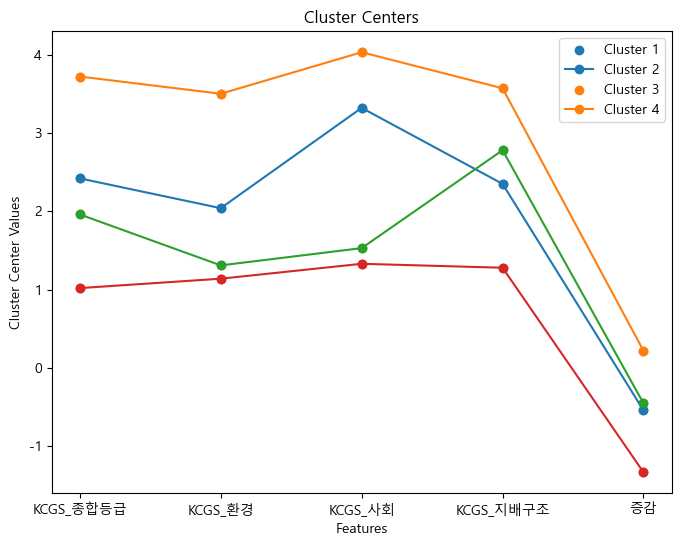

In [ ]:
import matplotlib.pyplot as plt

# 점으로 시각화
plt.figure(figsize=(8, 6))
for i in range(len(cluster_centers_df)):
    plt.scatter(range(len(cluster_centers_df.columns)), cluster_centers_df.iloc[i])
    plt.plot(range(len(cluster_centers_df.columns)), cluster_centers_df.iloc[i], '-o')

plt.xticks(range(len(cluster_centers_df.columns)), cluster_centers_df.columns)
plt.xlabel('Features')
plt.ylabel('Cluster Center Values')
plt.title('Cluster Centers')
plt.legend([f'Cluster {i+1}' for i in range(len(cluster_centers_df))])
plt.show()

자체 분석 코드
:PCA 차원 축소를 이용한 기업의 ESG 성과 분석 및 개선 전략

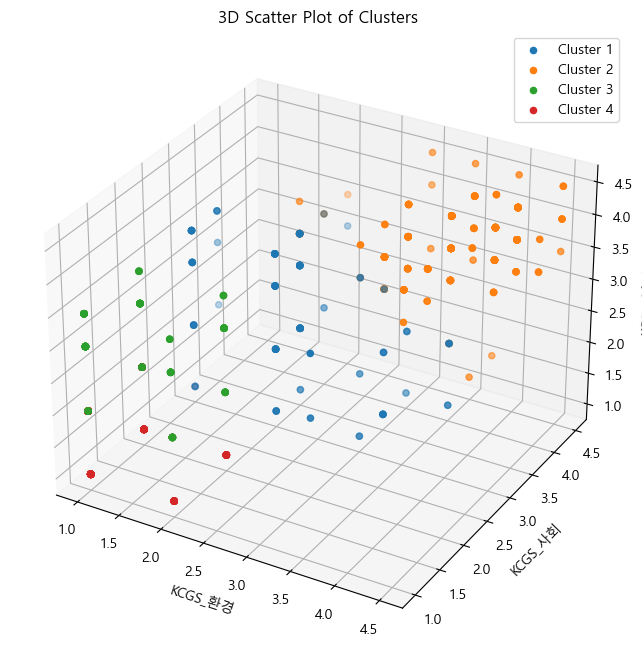

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(len(cluster_centers_df)):
    cluster_data = df_2023[df_2023['클러스터'] == cluster_num]
    ax.scatter(cluster_data['KCGS_환경_encoded'], cluster_data['KCGS_사회_encoded'], cluster_data['KCGS_지배구조_encoded'], label=f'Cluster {cluster_num+1}')

ax.set_xlabel('KCGS_환경')
ax.set_ylabel('KCGS_사회')
ax.set_zlabel('KCGS_지배구조')
ax.set_title('3D Scatter Plot of Clusters')
ax.legend()
plt.show()


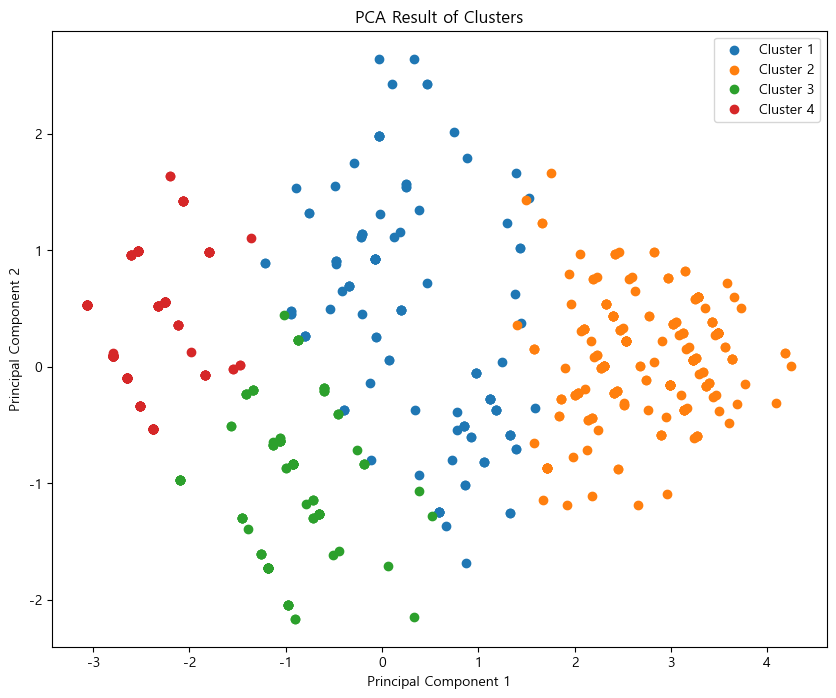

In [ ]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['클러스터'] = clusters

plt.figure(figsize=(10, 8))
for cluster_num in range(len(cluster_centers_df)):
    cluster_data = pca_df[pca_df['클러스터'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result of Clusters')
plt.legend()
plt.show()


In [ ]:
for cluster_num in range(len(cluster_centers_df)):
    cluster_data = df_2023[df_2023['클러스터'] == cluster_num]
    print(f"Cluster {cluster_num + 1}의 회사 개수: {len(cluster_data)}")
    print(cluster_data.describe())
    print('-' * 30)


Cluster 1의 회사 개수: 127
       KCGS_종합등급_encoded  KCGS_환경_encoded  KCGS_사회_encoded  KCGS_지배구조_encoded  \
count         127.000000       127.000000       127.000000         127.000000   
mean            2.417323         2.035433         3.322835           2.346457   
std             0.495070         0.721498         0.391008           0.898658   
min             2.000000         1.000000         2.000000           1.000000   
25%             2.000000         2.000000         3.000000           2.000000   
50%             2.000000         2.000000         3.500000           2.000000   
75%             3.000000         2.000000         3.500000           3.000000   
max             3.000000         3.500000         4.500000           3.500000   

       increase_decrease   클러스터  
count         127.000000  127.0  
mean           -0.535433    0.0  
std             0.658224    0.0  
min            -2.000000    0.0  
25%            -1.000000    0.0  
50%            -0.500000    0.0  
75%       

In [ ]:
# 주성분 분석 결과 (PCA)
explained_variance_ratio = pca.explained_variance_ratio_
components_df = pd.DataFrame({'Principal Component': ['PC1', 'PC2'],
                              'Explained Variance Ratio': explained_variance_ratio})

print(components_df)
print('-' * 30)

# 주성분과 변수들의 관계
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data.columns)

print(loadings_df)


  Principal Component  Explained Variance Ratio
0                 PC1                  0.809466
1                 PC2                  0.100062
------------------------------
                        PC1       PC2
KCGS_종합등급_encoded  1.133751 -0.103496
KCGS_환경_encoded    1.042163  0.339322
KCGS_사회_encoded    1.202886  0.366948
KCGS_지배구조_encoded  0.932425 -0.498226
increase_decrease  0.619806 -0.343865


1. 주성분 분석 설명:
분산 비율에 따라 PC1 주성분이 데이터의 변동성을 크게 성명하며 중요한 역할을 한다는 것을 알수 있다.
이는 종합등급, 환경, 사회 등의 변수들과 관련성을 가지고, PC2는 지배구조와 관련성을 가지고 있음을 알수 있다.

2. 클러스터 특성 파악:
PC1이 큰 클러스터는 종합등급, 환경, 사회 성과가 높은 경향이 있다.
PC2가 큰 클러스터는 지배구조와 관련된 성과가 낮은 경향이 있다.

3. 전략 도출:
PC1의 큰 영향을 받는 클러스터는 종합등급, 환경, 사회 점수를 개선하는 전략을 고려할 수 있다.
PC2의 큰 영향을 받는 클러스터는 지배구조와 관련된 성과를 개선하는 전략을 고려할 수 있다.